In [1]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import seaborn as sns

In [2]:
from sklearn.ensemble import bagging

In [5]:
data=pd.read_csv('diabetes.csv')

In [6]:
data_x=data[[col for col in data.columns if col!='Outcome']]
data_y=data['Outcome']

In [7]:
x_train,x_test,y_train,y_test=train_test_split(data_x,data_y,test_size=0.3)

In [13]:
%time model=bagging.BaggingClassifier(n_estimators=200,n_jobs=-1)

Wall time: 0 ns


In [9]:
model.max_samples=0.9

In [14]:
%time model.fit(x_train,y_train)

Wall time: 10.4 s


BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=200, n_jobs=-1, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

In [15]:
model.predict(x_test)

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1], dtype=int64)

In [17]:
metrics.accuracy_score(y_test,model.predict(x_test))

0.7445887445887446

In [21]:
model2=RandomForestClassifier(200)
%time model2.fit(x_train,y_train)

Wall time: 891 ms


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [22]:
metrics.accuracy_score(y_test,model2.predict(x_test))

0.7532467532467533

In [23]:
l1=[]
for i in range(30):
    x_train,x_test,y_train,y_test=train_test_split(data_x,data_y,test_size=0.3)
    model=bagging.BaggingClassifier(n_estimators=200,n_jobs=-1)
    model.max_samples=0.9
    model.fit(x_train,y_train)
    model.predict(x_test)
    l1.append(metrics.accuracy_score(y_test,model2.predict(x_test)))
    
    

In [33]:
l2=[]
for i in range(30):
    x_train,x_test,y_train,y_test=train_test_split(data_x,data_y,test_size=0.3)
    model2=RandomForestClassifier(1000)
    model2.fit(x_train,y_train)
    l2.append(metrics.accuracy_score(y_test,model2.predict(x_test)))
    
    

In [25]:
l=pd.DataFrame(columns=['f1','class'])

In [26]:
l['f1']=l1+l2
l['class']=['bag']*30+['rf']*30

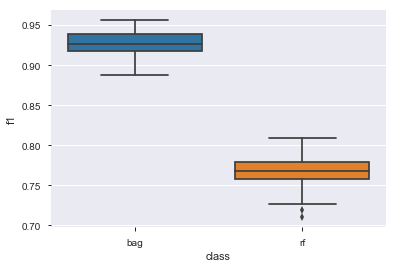

In [32]:
sns.boxplot(l['class'],l['f1'])